In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyBigWig


In [4]:
##Compartment analysis--Part II

df = pd.read_csv('gene_compartment_intersect.bed', sep='\t', comment='t', header=None)
header = ['chrom', 'interStart', 'interEnd', 'comScore', 'chrom2', 'geneStart', 'geneEnd', 'geneName', 'geneEXP', 'overlapBase']
df.columns = header[:len(df.columns)]
df.drop(columns=['chrom2'])
# print(df)

,chrom,interStart,interEnd,comScore,geneStart,geneEnd,geneName,geneEXP,overlapBase
0,chr13,3100000,3200000,-0.004578,3148721,3188924,Speer6-ps1,0.000000,40203.0
1,chr13,3400000,3500000,0.017047,3497296,3500639,1700024F13Rik,1.282941,2704.0
2,chr13,3400000,3500000,0.017047,3477549,3491644,2810429I04Rik,6.992451,14095.0
3,chr13,3500000,3600000,0.028550,3497296,3500639,1700024F13Rik,1.282941,639.0
4,chr13,3500000,3600000,0.028550,3537321,3565507,Gdi2,467.203283,28186.0
...,...,...,...,...,...,...,...,...,...
1252,chr13,120100000,120200000,-0.015882,120124334,120198064,Nn,NaN,NaN
1253,chr13,120200000,120300000,0.006238,120276064,120277191,3110070M22Rik,0.447908,1127.0
1254,chr13,120200000,120300000,0.006238,120277280,120284312,Tmem267,7.744482,7032.0
1255,chr13,120200000,120300000,0.006238,120217709,120249130,Paip1,27.549181,31421.0


In [6]:
gene_names=df.geneName.unique()

In [38]:
positive=[]
negative=[]
for gene in gene_names:
    indexes=df.index[df['geneName'] == gene].tolist()
    a=0
    for index in indexes:
        if df.iloc[index]['comScore']<0:
            a+=-df.iloc[index]['overlapBase']
        elif df.iloc[index]['comScore']>0:
            a+=df.iloc[index]['overlapBase']
    if a > 0:
        positive.append(gene)
    elif a <0:
        negative.append(gene)
print(negative)
print("positive",len(positive))
print("negative",len(negative))

            
        
    
    

['Speer6-ps1', 'Akr1c14', 'Akr1c18', 'Akr1c13', 'Akr1c20', 'Akr1c6', 'Akr1c21', 'Akr1e1', 'Adarb2', 'Chrm3', 'Zp4-ps', 'Prl2c4', 'Prl2c3', 'Prl2c2', 'Prl2c5', 'Gpr137b', 'Hecw1', 'Mrpl32', 'Psma2', 'AW209491', 'Gli3', '4933412O06Rik', 'A530046M15Rik', 'Inhba', 'Pou6f2', 'Gpr141', 'Vmn1r191', 'Vmn1r192', 'Vmn1r193', 'Vmn1r194', 'Vmn1r195', 'Vmn1r196', 'Vmn1r197', 'Vmn1r198', 'Vmn1r199', 'Vmn1r200', 'Vmn1r-ps103', 'Vmn1r201', 'Vmn1r202', 'Vmn1r203', 'Vmn1r204', 'Vmn1r205', 'Vmn1r206', 'Vmn1r213', 'Vmn1r214', 'Vmn1r215', 'Vmn1r216', 'Vmn1r217', 'Vmn1r218', 'Vmn1r219', 'Vmn1r220', 'Nrsn1', 'Gm11351', '1700092E19Rik', 'Hdgfl1', 'Prl', 'Prl3d1', 'Prl3d3', 'Prl3c1', 'Prl3d2', 'Prl3b1', 'Prl3a1', 'Prl6a1', 'Prl8a2', 'Prl2b1', 'Prl8a8', 'Prl8a6', 'Prl7b1', 'Prl8a1', 'Prl8a9', 'Prl7a1', 'Prl7a2', 'Prl2a1', 'Prl7d1', 'Prl7c1', 'Prl2c1', 'Prl4a1', 'Prl5a1', '2610307P16Rik', 'Mir6368', 'Sox4', 'A330102I10Rik', 'Uqcrfs1', '4930519D14Rik', 'Dusp22', 'Irf4', 'Exoc2', '4930401O12Rik', 'Foxq1', '1700018

In [40]:
df_genes = pd.read_csv('/Users/xiangning/qbb2020-answers/HW9/3DGenomeData/data/WT_fpkm.bed', sep='\t', comment='t', header=None)
header = ['chrom', 'Start', 'End', 'geneName', 'geneEXP']
df_genes.columns = header[:len(df_genes.columns)]
df_genes

,chrom,Start,End,geneName,geneEXP
0,chr1,3204563,3661579,Xkr4,0.632943
1,chr1,4333588,4350395,Rp1,0.000000
2,chr1,4481009,4487435,Sox17,2.773037
3,chr1,4763279,4775807,Mrpl15,66.038345
4,chr1,4797904,4836816,Lypla1,168.950819
...,...,...,...,...,...
23847,chrY_random,48388361,48390745,Ss,NaN
23848,chrY_random,50814754,50817087,Gm20823,0.000000
23849,chrY_random,52515006,52517353,Gm20747,0.000000
23850,chrY_random,53819455,53820453,Gm20806,0.000000


In [44]:
positive_exp=[]
negative_exp=[]
for gene in positive:
    index=df_genes.index[df_genes['geneName'] == gene].tolist()
    exp=df_genes.iloc[index[0]]['geneEXP']
    positive_exp.append(exp)

for gene in negative:
    index=df_genes.index[df_genes['geneName'] == gene].tolist()
    exp=df_genes.iloc[index[0]]['geneEXP']
    negative_exp.append(exp)

positive_exp=np.asarray(positive_exp)
negative_exp=np.asarray(negative_exp)


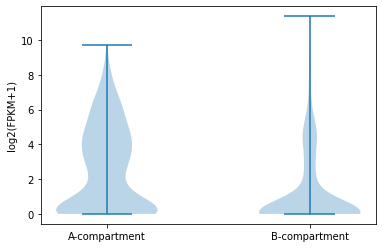

In [48]:
fig = plt.figure() 
ax = fig.gca() 

violinplot = ax.violinplot([np.log2(positive_exp+1),np.log2(negative_exp+1)])

plt.xticks([1,2],['A-compartment','B-compartment'])
plt.ylabel('log2(FPKM+1)')
plt.savefig('violin_plot.png')
plt.show()

In [78]:
##Expression vs. Repression
bw = pyBigWig.open('/Users/xiangning/qbb2020-answers/HW9/3DGenomeData/data/WT_H3K27me3.bw')
H3K27me3_positive=[]
H3K27me3_negative=[]
for gene in positive:
    index=df_genes.index[df_genes['geneName'] == gene].tolist()
    start=df_genes.iloc[index[0]]['Start']
    end=df_genes.iloc[index[0]]['End']    
    signal=bw.stats('chr13', start, end, type='sum')
    H3K27me3_positive.append(signal[0])
    
for gene in negative:
    index=df_genes.index[df_genes['geneName'] == gene].tolist()
    start=df_genes.iloc[index[0]]['Start']
    end=df_genes.iloc[index[0]]['End']    
    signal=bw.stats('chr13', start, end, type='sum')
    H3K27me3_negative.append(signal[0])
H3K27me3_positive = np.asarray(H3K27me3_positive)
H3K27me3_negative = np.asarray(H3K27me3_negative)
# inds = np.where(np.isnan(H3K27me3_positive))

inds=np.where(H3K27me3_positive==None)
H3K27me3_positive[inds] = 0.0

inds=np.where(H3K27me3_negative==None)
H3K27me3_negative[inds] = 0.0
print(H3K27me3_positive)
    

[0.0 1.1559633016586304 5.24098813533783 4.349898099899292 2018.0 1804.0
 1723.0 3.6770132780075073 13.050795912742615 896.0 3.8532291650772095
 6.333247184753418 7116.0 10.265861511230469 2.5333863496780396
 3.822003126144409 2.1217455863952637 0.0 3.375757932662964
 5.196273684501648 3.4853819608688354 7.430121421813965 1.4024064540863037
 4.686390042304993 4.209444999694824 8.12670350074768 4.0
 3.3677273988723755 16.832703232765198 6.398284196853638
 2.0542393922805786 5.534157633781433 2.7603795528411865 90.0
 3.3118643760681152 2.3833091259002686 3.465473175048828
 1.1403647661209106 6.752721786499023 2.3337411880493164
 11.681795597076416 6.133742928504944 12.279924631118774 3.439613461494446
 8.30474042892456 3.0152162313461304 1663.0 57.0 4713.0 1.0
 9.755384683609009 12.060001850128174 1543.0 35.0 5.45170533657074
 2.7526532411575317 0.0 18155.0 17.7965829372406 6640.0 4.7042165994644165
 2.7978798151016235 3795.0 2039.0 1448.0 2.062114953994751 1182.0 1390.0
 3449.0 200.0 0.

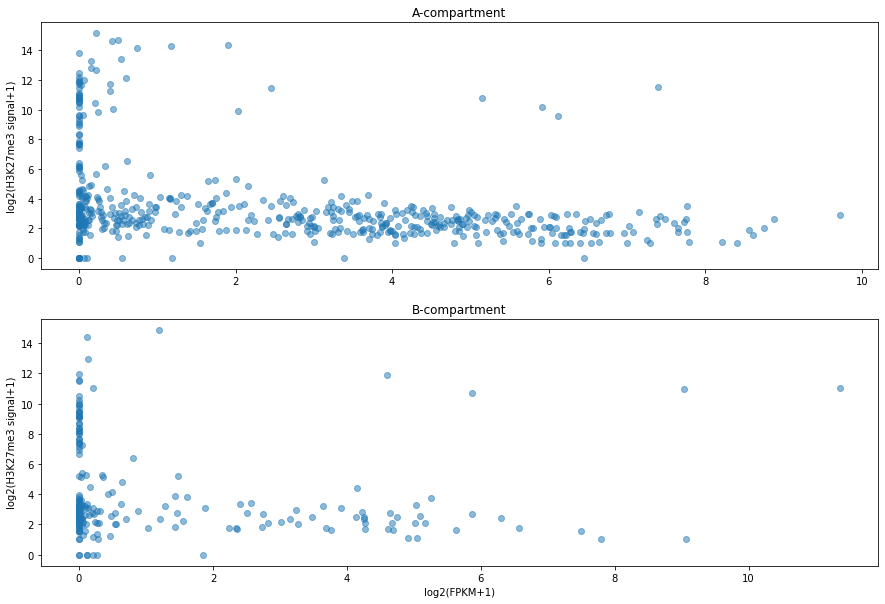

In [86]:
plt.rcParams["figure.figsize"] = (15,10)
fig,ax=plt.subplots(2)

ax[0].scatter(x=np.log2(positive_exp+1),y=np.log2(H3K27me3_positive.astype(float)+1),alpha=0.5)
ax[1].scatter(x=np.log2(negative_exp+1),y=np.log2(H3K27me3_negative.astype(float)+1),alpha=0.5)
ax[1].set_xlabel('log2(FPKM+1)')
ax[0].set_title('A-compartment')
ax[1].set_title('B-compartment')

ax[1].set_ylabel('log2(H3K27me3 signal+1)')
ax[0].set_ylabel('log2(H3K27me3 signal+1)')
plt.savefig('scatterplot.png')
plt.show()